# Titanic: Machine Learning from Disaster | Kaggle

Etapas desse _notebook_:

1. Importar as bibliotecas necessárias;
2. Carregar o dataframe de testes;
3. Verifica a distribuição de cada variável (quantas existem, quantas estão faltando, distribuição por valor);
4. Testa alguns modelos de predição

### Importa as bibliotecas
Pandas, numpy, scikit-learn

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

# A few classifiers
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

% matplotlib inline

### Carrega o dataset de treino

In [104]:
df = pd.read_csv('train.csv', keep_default_na=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Verificar a distribuição de cada variável

In [105]:
print (df.describe ());
print ("\n");

df.info();

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data co

### Arruma o dataset
** Talvez essa sessão mereça ser quebrada em mais sessões **

### Visualização dos dados





     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


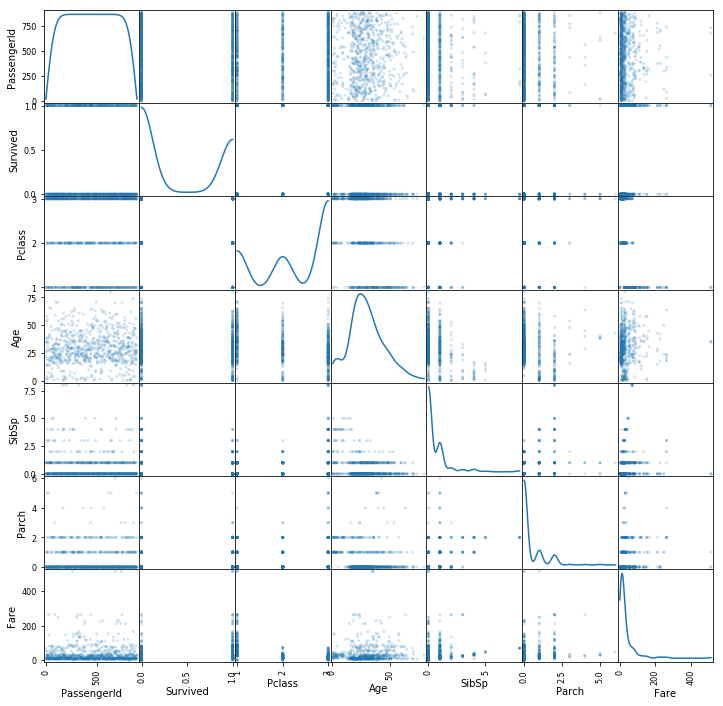

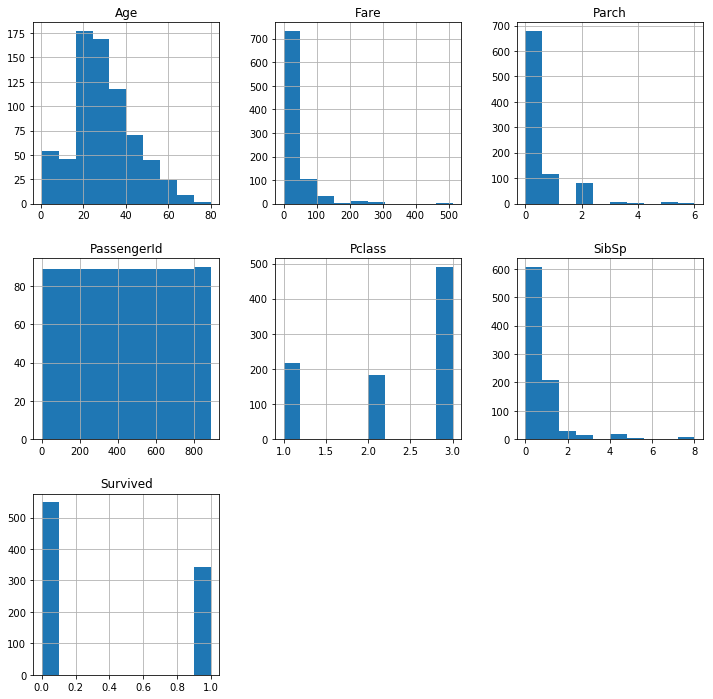

In [112]:
scatter_matrix (df, alpha=0.2, figsize=(12, 12), diagonal='kde');
print ("\n");
       
df.hist (figsize=(12, 12));
print ("\n");

### Divide o dataset em treino e validação

In [107]:
def processData (df):
    mapping = { "female": 0, "male": 1, "C": 0, "S": 1, "Q": 2 }
    to_drop = [ 'Name', 'PassengerId', 'Ticket', 'Cabin', 'Age', 'Fare', 'Embarked' ]
    
    X = df.drop(to_drop, axis=1).applymap(lambda s: mapping.get(s) if s in mapping else s).apply(pd.to_numeric)
    y = None
    
    if 'Survived' in df:
        X = X.drop('Survived', axis=1)
        y = df['Survived']
    
    return X, y

train, test = train_test_split(df, test_size = 0.3)
X_train, y_train = processData (train)
X_test, y_test = processData (test)

print ("X train head:")
print (X_train.head())

print ("\nX test head:")
print (X_test.head())

X train head:
     Pclass  Sex  SibSp  Parch
327       2    0      0      0
490       3    1      1      0
67        3    1      0      0
2         3    0      0      0
227       3    1      0      0

X test head:
     Pclass  Sex  SibSp  Parch
102       1    1      0      1
784       3    1      0      0
41        2    0      1      0
853       1    0      0      1
325       1    0      0      0


### Teste inicial de predição para diferentes modelos

In [108]:
classifiers = { 'SVM': svm.SVC(), 'NeuralNetwork': MLPClassifier(), 'DecisionTree': DecisionTreeClassifier(), 
           'SGD': SGDClassifier(), 'GNB': GaussianNB(), 'AdaBoost': AdaBoostClassifier(), 
           'GradientBoosting': GradientBoostingClassifier() }

for (name, classifier) in classifiers.items():
    model = classifier.fit (X_train, y_train)
    y_pred = model.predict (X_test)
    print (classifier)
    print (classification_report (y_test, y_pred))
    print ("\n")

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.80      0.89      0.85       159
          1       0.81      0.68      0.74       109

avg / total       0.81      0.81      0.80       268



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
             precision    recall  f1-score   support

          0       0.81      0.89      0.85       159
          1       

### Faz a predição com os dados de teste do Kaggle

In [114]:
df_test = pd.read_csv('test.csv', keep_default_na=True)
df_test.head()

X, y = processData (df_test)

classifier_type = 'NeuralNetwork'
classifier = classifiers[classifier_type]
model = classifier.fit (X_train, y_train)
y_pred = model.predict (X)

output = pd.DataFrame()
output['PassengerId'] = df_test['PassengerId']
output['Survived'] = y_pred

print (output.head())

output.to_csv('output.csv', index=False)

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
